<a href="https://colab.research.google.com/github/satwiksps/Quantum_Computing/blob/main/9_Quantum_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Fourier Transform (QFT)
Quantum Fourier Transform (QFT) is a quantum algorithm that transforms a quantum state into its Fourier basis, efficiently extracting frequency components. It uses quantum parallelism to perform this transformation exponentially faster than classical Fourier transforms.

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.7 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c31044362519f5e08270b2e2c89be3d190b0ef7e59c5ad0600c8c169f6e4f966
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Function to apply QFT
def apply_qft(circuit, n):
    for j in range(n):
        for k in range(j):
            circuit.cp(np.pi/2**(j-k), k, j)
        circuit.h(j)

In [ ]:
# Function to apply inverse QFT
def apply_inverse_qft(circuit, n):
    for j in range(n//2):
        circuit.swap(j, n-1-j)
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            circuit.cp(-np.pi/2**(j-k), k, j)

In [ ]:
# Create a quantum circuit
num_qubits = 3
qf = QuantumCircuit(num_qubits)

# Apply Hadamard gates to nitialize the qubits to a superposition state
qf.h(range(num_qubits))

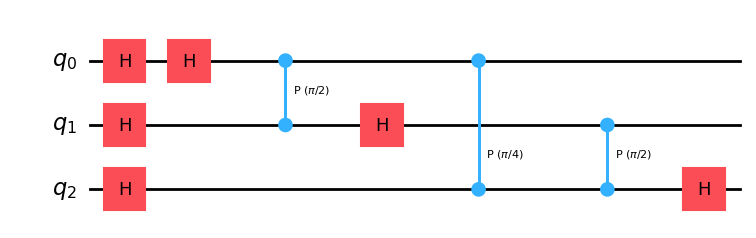

In [ ]:
# Apply QFT
apply_qft(qf, num_qubits)

# Draw the circuit after QFT
qf.draw('mpl')

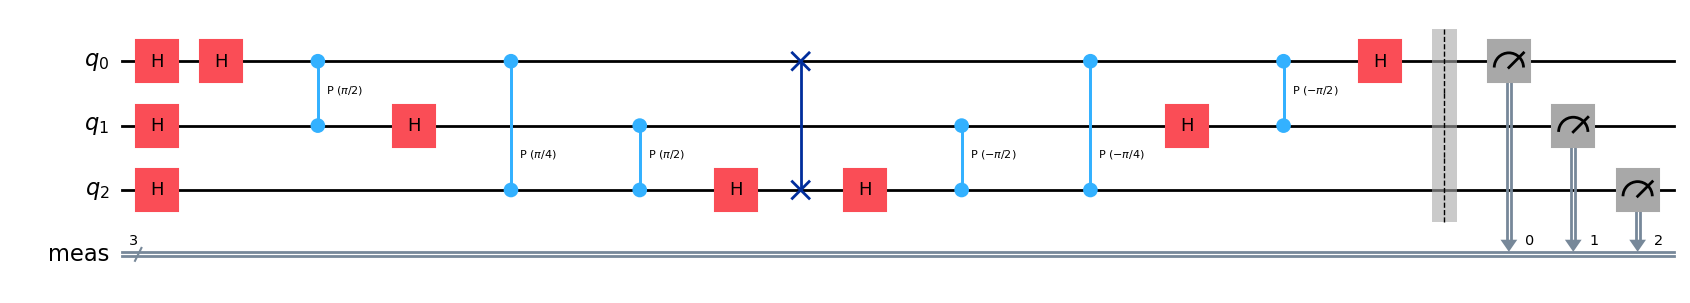

In [ ]:
# Apply inverse QFT to verify correctness
apply_inverse_qft(qf, num_qubits)

# Measure the qubits
qf.measure_all()

# Draw the final circuit
qf.draw('mpl')

In [ ]:
# Initialize the simulatorz
simulator = AerSimulator()

# Transpile and execute the circuit on the simulator
compiled_circuit = transpile(qf, simulator)

result = simulator.run(compiled_circuit).result()

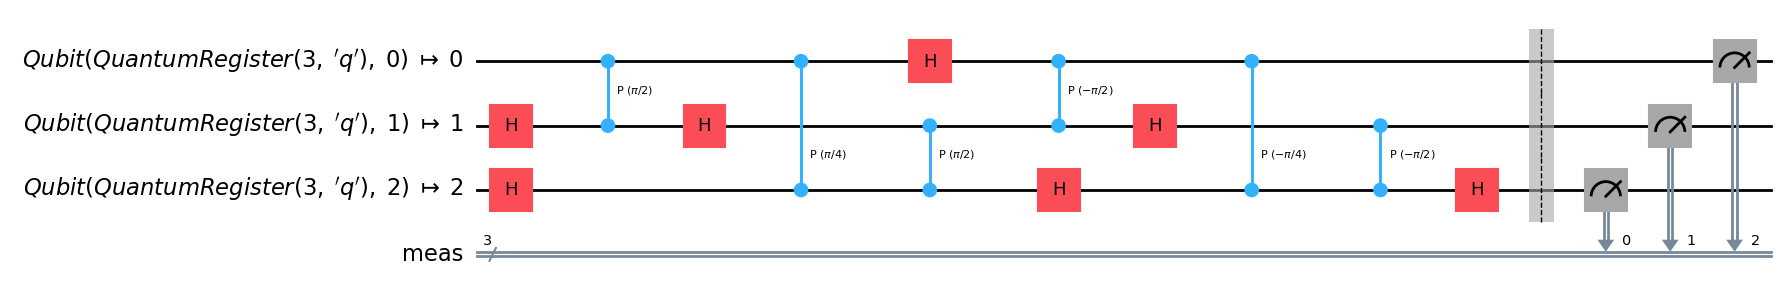

In [ ]:
# Draw the transpiled circuit
compiled_circuit.draw('mpl')

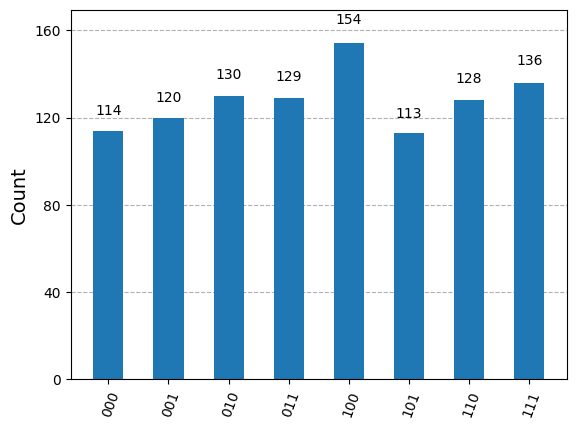

In [ ]:
# Get and plot the results
counts = result.get_counts(qf)
plot_histogram(counts)